$$ {\huge \text{ Disciplina: Lógica Fuzzy }}\\  \\  \text{ Cap 10/11 - Agrupamento Fuzzy e Reconhecimento de Padrões}\\
\ \  \ \ \ \ 
\\
 { \it  \text{ Discente: Prof. Dr. João Fernando }  }
 \\
\text{ Monitor: Arnaldo Araújo} \\
\text{ Mestrado e Doutorado em Ciências da Computação - UFC }$$


## Exemplo 10.8

<img src="Images/exem1081.png">

<img src="Images/exem1082.png">

<img src="Images/exem1083.png">

In [21]:
import scipy


In [37]:
import numpy as np
import math
import scipy
from sympy import *
from numpy import *
from scipy import *
from IPython.display import Latex
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 
from __future__ import division
import numpy as np
import math
import scipy
from sympy import *
from numpy import *
from IPython.display import Latex
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 
from __future__ import division

In [14]:
pontos= np.array([[1, 3],[1.5, 3.2] ,[ 1.3, 2.8],[3, 1]])


In [15]:
pontos

array([[ 1. ,  3. ],
       [ 1.5,  3.2],
       [ 1.3,  2.8],
       [ 3. ,  1. ]])

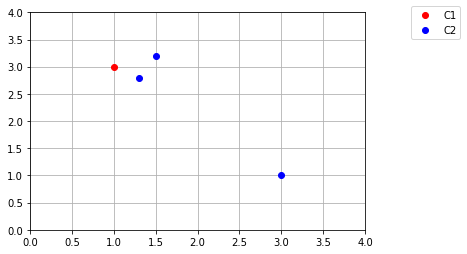

In [16]:
fig,ax = plt.subplots()

ax.plot(pontos[0,0], pontos[0,1],'ro',label='C1')
ax.plot(pontos[1:4,0],pontos[1:4,1],'bo',label='C2')
ax.axis([0, 4, 0, 4])
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.30, 1.05))
ax.grid(True)
plt.show()

In [23]:
#Equação 10.13
c=2 #quantidade de clusters
n=4 #qtd de pontos

soma = 0 
for i in range(1,c+1):
    soma =  soma + scipy.special.binom(c,i)*(-1)**(c-i)*i**(n)

Nmc = (1 /math.factorial(c))*soma
Nmc

7.0

## Temos então 7 possíveis combinações

In [24]:
#matriz de classificação
U = array([[1,0,0,0],[0,1,1,1]])
U

array([[1, 0, 0, 0],
       [0, 1, 1, 1]])

In [25]:
# matriz de coordenadas para os centroídes.
m=2
v = np.zeros((i,m))
v

array([[ 0.,  0.],
       [ 0.,  0.]])

In [27]:
#temos que achar as coordenadas x e y para cada um dos valoes
#O primeiro elemento está em C1
#Os outros 3 em C2
v[0,0] = (1 * pontos[0,0])/sum(U[0,:])
print(v[0,0])
v[0,1] = (1 * pontos[0,1])/sum(U[0,:])
print(v[0,1])
v[1,0] = sum(pontos[1:4,0]) /sum(U[1,:])
print(v[1,0])
v[1,1] = sum(pontos[1:4,1])/sum(U[1,:])
print(v[1,1])

1.0
3.0
1.93333333333
2.33333333333


In [28]:
#TEMOS OS SEGUINTES CENTROIDES
v

array([[ 1.        ,  3.        ],
       [ 1.93333333,  2.33333333]])

In [29]:
#Vamos definir uma função para calcular distância.
#passa as coordenadas do ponto (x,y) e as coordenadas do centro (cx,cy)
def distancia(x,y,cx,cy):
    return math.sqrt((x-cx)**2 + (y-cy)**2)

In [30]:
#para cada um dos pontos vamos calcular a sua distância aos centroídes
d = np.zeros((2,4))
d
for l in range(2):
    for c in range(4):
        d[l,c] = distancia(pontos[c,0],pontos[c,1],v[l,0],v[l,1])

In [31]:
d

array([[ 0.        ,  0.53851648,  0.36055513,  2.82842712],
       [ 1.1469767 ,  0.96896279,  0.78669491,  1.7074998 ]])

In [32]:
#vamos calcular a nova matriz U1
U1 =  np.zeros((2,4))
for l in range(4):
    c = argmin(d[:,l])
    U1[c,l] = 1
    
U1

array([[ 1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

## Como as matrizes U e U1 são diferentes, precisamos calcular os novos centroídes.


In [33]:
v[0,0] = sum(pontos[0:3,0])/sum(U1[0,:])
print(v[0,0])
v[0,1] = sum(pontos[0:3,1])/sum(U1[0,:])
print (v[0,1])
v[1,0] = pontos[3,0] /sum(U1[1,:])
print (v[1,0])
v[1,1] = (pontos[3,1])/sum(U1[1,:])
print (v[1,1])

1.26666666667
3.0
3.0
1.0


In [34]:
#vamos agora calcular as novas distâncias aos centróides
for l in range(2):
    for c in range(4):
        d[l,c] = distancia(pontos[c,0],pontos[c,1],v[l,0],v[l,1])
d

array([[ 0.26666667,  0.30731815,  0.20275875,  2.6465911 ],
       [ 2.82842712,  2.66270539,  2.47588368,  0.        ]])

In [35]:
#vamos calcular a nova matriz U2
U2 =  np.zeros((2,4))
for l in range(4):
    c = argmin(d[:,l])
    U2[c,l] = 1
    
U2

array([[ 1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Como as partições U1 e U2 são identicas, chegamos ao nosso conjunto de partição ótimo

# Exemplo 10.11

<img src="Images/exem102112.png">

In [39]:
pontos= np.array([[1, 3],[1.5, 3.2] ,[ 1.3, 2.8],[3, 1]])

In [40]:
pontos

array([[ 1. ,  3. ],
       [ 1.5,  3.2],
       [ 1.3,  2.8],
       [ 3. ,  1. ]])

In [41]:
#Primeiro vamos definir a matriz de agrupamento inicial
#matriz de classificação
U = array([[1,1,1,0],[0,0,0,1]])
U

array([[1, 1, 1, 0],
       [0, 0, 0, 1]])

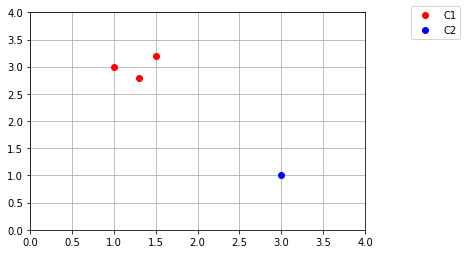

In [42]:
fig,ax = plt.subplots()
ax.plot(pontos[0:3,0], pontos[0:3,1],'ro',label='C1')
ax.plot(pontos[3,0],pontos[3,1],'bo',label='C2')
ax.axis([0, 4, 0, 4])
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.30, 1.05))
ax.grid(True)
plt.show()

In [44]:
# matriz de coordenadas para os centroides.
m=2
c=2
v = np.zeros((c,m))
#agora vamos calcular a posição dos centros iniciais dos clusters
for l in range(v.shape[0]):
        for k in range(v.shape[1]):
            dividendo = 0
            divisor = 0
            for i in range(pontos.shape[0]):
                dividendo = dividendo + ((U[l,i])**2)*(pontos[i,k])
                divisor = divisor + (U[l,i]**2)
            v[l,k] = dividendo/divisor

In [45]:
v

array([[ 1.26666667,  3.        ],
       [ 3.        ,  1.        ]])

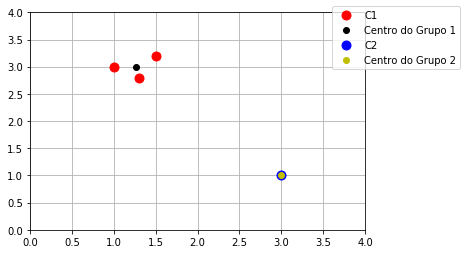

In [46]:
fig,ax = plt.subplots()
ax.plot(pontos[0:3,0], pontos[0:3,1],'ro',markersize=9,label='C1')
ax.plot(v[0,0],v[0,1],'ko',label='Centro do Grupo 1')
ax.plot(pontos[3,0],pontos[3,1],'bo',markersize=9,label='C2')
ax.plot(v[1,0],v[1,1],'yo',label='Centro do Grupo 2')
ax.axis([0, 4, 0, 4])
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.30, 1.05))
ax.grid(True)
plt.show()

In [47]:
#Vamos definir uma função para calcular a distância.
#passa as coordenadas do ponto (x,y) e as coordenadas do centro (cx,cy)
def distancia(x,y,cx,cy):
    return math.sqrt((x-cx)**2 + (y-cy)**2)

In [48]:
#Agora vamos calcular a distância de cada ponto até os centroides
d = np.zeros((2,4))
for l in range(2):
    for c in range(4):
        d[l,c] = distancia(pontos[c,0],pontos[c,1],v[l,0],v[l,1])
d

array([[ 0.26666667,  0.30731815,  0.20275875,  2.6465911 ],
       [ 2.82842712,  2.66270539,  2.47588368,  0.        ]])

In [49]:
U1 = np.zeros((2,4))
#Agora vamos determinar quão pertinente é cada elemento aos 2 clusters
for l in range(2):
    for c in range(4):
        U1[l,c] = (( d[l,c]/d[0,c] )**2 + (d[l,c]/d[1,c])**2)**(-1)
U1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


array([[ 0.99118943,  0.98685431,  0.99333813,  0.        ],
       [ 0.00881057,  0.01314569,  0.00666187,         nan]])

## OBSERVAÇÃO -> Há uma restrição de integridade sobre os dados diante dos valores que expressam a perniência nas classes. A soma destes valores deve ser 1, logo o campo U[1,3] deve receber diretamente 1.}}

In [50]:
U1[1,3] = 1

In [51]:
U1

array([[ 0.99118943,  0.98685431,  0.99333813,  0.        ],
       [ 0.00881057,  0.01314569,  0.00666187,  1.        ]])

In [52]:
#matriz de classificação
U = array([[1,1,1,0],[0,0,0,1]])
U

array([[1, 1, 1, 0],
       [0, 0, 0, 1]])

De posse da matriz de agrupamento, vamos avaliar o critérios de convergência.

In [53]:
maior = 0
for l in range(2):
    for c in range(4):
        var = np.abs(U1[l,c] - U[l,c])
        if var > maior:
            maior = var
            maxi = maior
print(maxi)

0.0131456851222


Como o valor encontrado é maior que o critério de convergência, 0.001, devemos continuar o processo de clusterização.

In [54]:
v

array([[ 1.26666667,  3.        ],
       [ 3.        ,  1.        ]])

In [55]:
U1

array([[ 0.99118943,  0.98685431,  0.99333813,  0.        ],
       [ 0.00881057,  0.01314569,  0.00666187,  1.        ]])

In [57]:
pontos

array([[ 1. ,  3. ],
       [ 1.5,  3.2],
       [ 1.3,  2.8],
       [ 3. ,  1. ]])

In [58]:
v1 = np.zeros((2,2))
for j in range(2):
    for i in range(2):
        soma1 = 0
        soma2 = 0
        for k in range(4):
            soma1 = soma1 + ((U1[j,k])**2)*pontos[k,i]
            soma2 = soma2 + ((U1[j,k])**2)
        v1[j,i] = soma1/soma2
v1

array([[ 1.26603511,  2.99912749],
       [ 2.99951023,  1.00061514]])

In [59]:
v

array([[ 1.26666667,  3.        ],
       [ 3.        ,  1.        ]])

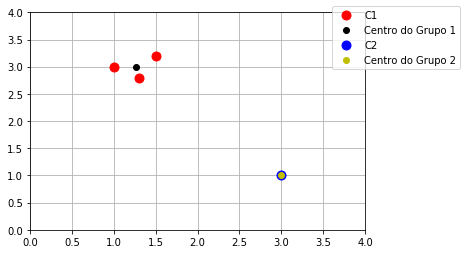

In [60]:
fig,ax = plt.subplots()
ax.plot(pontos[0:3,0], pontos[0:3,1],'ro',markersize=9,label='C1')
ax.plot(v1[0,0],v1[0,1],'ko',label='Centro do Grupo 1')
ax.plot(pontos[3,0],pontos[3,1],'bo',markersize=9,label='C2')
ax.plot(v1[1,0],v1[1,1],'yo',label='Centro do Grupo 2')
ax.axis([0, 4, 0, 4])
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.30, 1.05))
ax.grid(True)
plt.show()

Como v e v1 são praticamente idênticos, temos que o conjunto U1 é a melhor matriz
de clusterização.

# Exemplo 10.12

<img src="Images/exem10121.png">

<img src="Images/exem10122.png">

<img src="Images/exem10123.png">

<img src="Images/exem10124.png">

In [65]:
#U1
U1 = np.array([[0.000,0.973,0.998,0.000,0.976,0.998],[1.000,0.027,0.002,1.000,0.024,0.002]])
U1

array([[ 0.   ,  0.973,  0.998,  0.   ,  0.976,  0.998],
       [ 1.   ,  0.027,  0.002,  1.   ,  0.024,  0.002]])

In [66]:
U2 = array([[0,0,1,0,0,1],[0,1,0,0,1,0],[1,0,0,1,0,0]])
U2

array([[0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0]])

In [67]:
U1tr = U1.transpose()
ResU1 = np.dot(U1,U1tr)
FU1 = ResU1.trace()/6
FU1

0.98210433333333336

In [68]:
U2tr = U2.transpose()
ResU2 = np.dot(U2,U2tr)
FU2 = ResU2.trace()/6
FU2

1.0

A medida que o valor de F(U) aumenta, melhor a clusterização dos dados.

## Exemplo 10.13

<img src="Images/exem1013.png">

In [70]:
# Método da maior pertinência
U = array([[0.991,0.986,.0993,0],[0.009,0.014,0.007,1]])
U

array([[ 0.991 ,  0.986 ,  0.0993,  0.    ],
       [ 0.009 ,  0.014 ,  0.007 ,  1.    ]])

In [71]:
Umax = np.zeros((2,4))
Umax

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [72]:
for i in range(4):
    c = argmax(U[:,i])
    Umax[c,i] = 1
Umax

array([[ 1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [73]:
d = array([[0.26,0.31,0.20,2.65],[2.82,2.66,2.47,0]])
d

array([[ 0.26,  0.31,  0.2 ,  2.65],
       [ 2.82,  2.66,  2.47,  0.  ]])

In [74]:
Umin = np.zeros((2,4))
Umin

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [75]:
for i in range(4):
    c = argmin(d[:,i])
    Umin[c,i] = 1
Umin

array([[ 1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

## Exemplo 10.14

<img src="Images/exem1014.png">

In [76]:
U = array([[0.91,0.58,0.13],[0.09,0.42,0.87]])
UT = U.transpose()
UT

array([[ 0.91,  0.09],
       [ 0.58,  0.42],
       [ 0.13,  0.87]])

In [78]:
r = np.zeros((3,3))
for i in range(3):
        k = i
        while k<3:
            soma = 0
            soma = soma + min(UT[i,0],UT[k,0]) + min(UT[i,1],UT[k,1])
            r[i,k] = soma
            r[k,i] = soma
            k = k+1
r

array([[ 1.  ,  0.67,  0.22],
       [ 0.67,  1.  ,  0.55],
       [ 0.22,  0.55,  1.  ]])